https://towardsdatascience.com/advanced-tutorial-how-to-master-matplotlib-like-an-absolute-boss-aae2d4936734

In [5]:
# wczytanie wykorzystywanych bibliotek
import numpy as np
import pandas as pd
import os 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# ustawienia
warnings.filterwarnings("ignore")
plt.rcParams['figure.dpi'] = 140

#ścieżki
data_path = Path('./data/')
foto_path = Path('./foto/')

Zaczynamy od wykonania wykresu za pomocą figur. Przez figurę mam na myśli klasę najwyższego poziomu w Matplotlib o której możemy myśleć jak o białym płutnie na którym będziemy malować obraz

In [6]:
fig = plt.figure()

<Figure size 840x560 with 0 Axes>

W tym momencie stworzyliśmy figurę i jak widać nie posiada ona Osi (Axes) oraz nie zostala wyświetlona. W drugiej kolejności dodajemy do wykresu osie reprezentujące koordynaty x oraz y. Można to zrobić za pomocą funkcji _add_axes()_ ale w praktyce najczęściej od razu dodajemy jedną lub kilka osi za pomocą funkcji _subplots()_

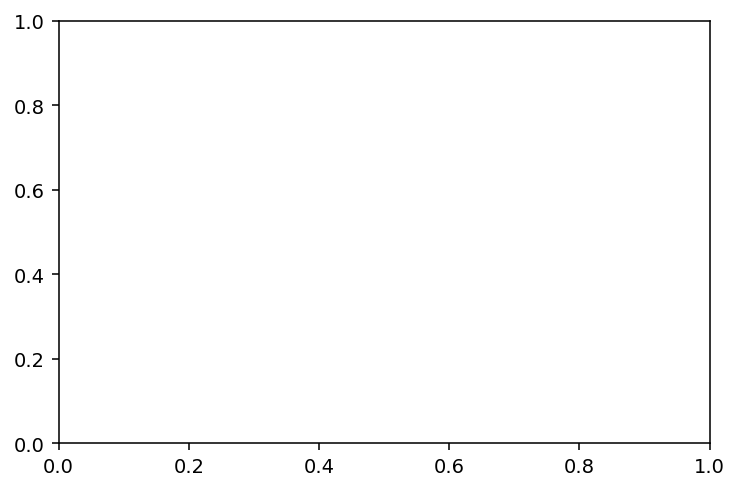

In [8]:
# metoda pierwsza 
ax1 = fig.add_axes()

# metoda najczęściej wykorzystywana
fig, ax = plt.subplots()
#plt.savefig(os.path.join(foto_path, "20_clear_fig.png"),format='png', dpi=300, facecolor="White")

Jak widać po dodaniu osi pojawia się pusty wykres wraz z wyświetlonym układem współżędnym (koordynatami).  
Teraz dodamy do wykresu a raczej DO OSI elementy wykorzystując metody klasy Axes


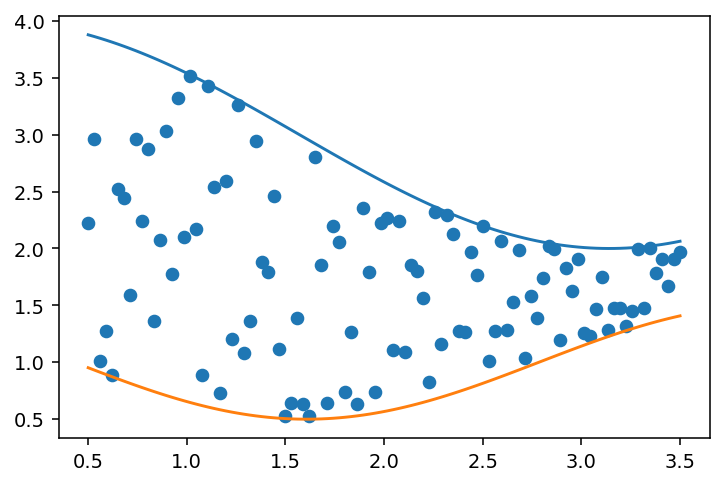

In [13]:
fig, ax = plt.subplots()

# generowanie liczb losowych
X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

# wykorzystanie metod osi
ax.scatter(X, Y3)
ax.plot(X, Y1)
ax.plot(X, Y2);
#plt.savefig(os.path.join(foto_path, "21_random_data.png"),format='png', dpi=300, facecolor="White")

Wykres wymaga paru korekt:
1. Defaultowe kolory do poprawy
2. Grubość linii oraz wielkość punktów
3. Dodanie opisu osi, tytułu wykresu, legendy, modyfikacja skali itp. 
4. Rozmiar samego rysunku, ustawiony parametr wielkości (zaraz po zaimportowaniu biblioteki) wydaje się przesadnie duży.  

Zatem mamy nasz wykres bazowy a teraz możemy się do niego dobrać i poprawić interesujące nas element